### 6 m is mean nitricline depth and just below 10% light level

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os
import glob
import datetime as dt
from salishsea_tools import viz_tools
from matplotlib.ticker import FormatStrFormatter
import cmocean
from salishsea_tools import viz_tools, evaltools as et
import NorthNut as nn
import matplotlib.gridspec as gridspec
import pickle
import matplotlib as mpl
import matplotlib.patheffects as path_effects
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

NorthNut defined variables: ig0,ig1,jg0,jg1,fformat0
NorthNut defined variables: vmask, vmask0, umask, umask0, tmask, fmask, gdept,  gdept_1d, e1t, e2t, e12t, e1f, e2f, e1v, e2u, e3t_1d
NorthNut defined variables: boxCol, colL, colR, arrowwidth, headwidth, headlength, alen, toff, apw, apk


In [2]:
ig0=nn.ig0
ig1=nn.ig1
jg0=nn.jg0
jg1=nn.jg1
tmask=nn.tmask
umask=nn.umask
vmask=nn.vmask
umask0=nn.umask0
vmask0=nn.vmask0
boxCol=nn.boxCol
colL=nn.colL
colR=nn.colR

In [3]:
e12t=nn.e12t

In [4]:
k=6 #depth presented here
k1=30 # max depth to do calcs to
start=dt.datetime(2015,5,15) # originally 5/15-8/15,  but changed to even number of fortnights (6, end is included)
end=dt.datetime(2015,8,20)
mod_basedir='/data/eolson/results/MEOPAR/SS36runs/linkHC201812/'
mod_nam_fmt='nowcast'
mod_flen=1
saveloc='/data/eolson/results/MEOPAR/SS36runs/calcFiles/NTransport/'
fver='HC201812'

made interval a multiple of a fortnight in attempt to minimize aliasing of tidal cycle:

In [5]:
dt.datetime(2015,5,15)+dt.timedelta(days=7*14)

datetime.datetime(2015, 8, 21, 0, 0)

In [6]:
# calc transports: boxes in full model coords
boxes,boxesS=nn.defboxes(k)

volumes: 
(40, 130, 97)
0 vol: 232834007.16923195 m3
0 north face area: 0.017903174399708822 km2
0 south face area: 0.023887115963210383 km2
0 east face area: 0.0 km2
0 floor area: 38.10316762126778 km2
0 floor area: 38.10316762126778 km2
(40, 130, 97)
1 vol: 475501033.2591236 m3
1 north face area: 0.051981996171633744 km2
1 south face area: 0.0660928789851366 km2
1 east face area: 0.04443908484818648 km2
1 floor area: 76.65649877674242 km2
1 floor area: 76.65649877674242 km2
(40, 130, 97)
2 vol: 467855857.4262955 m3
2 north face area: 0.0660928789851366 km2
2 south face area: 0.058877382444252245 km2
2 east face area: 0.044474769797453136 km2
2 floor area: 76.13281888160705 km2
2 floor area: 76.13281888160705 km2
(40, 130, 97)
3 vol: 475349561.3011287 m3
3 north face area: 0.0691002936013758 km2
3 south face area: 0.05633497645148102 km2
3 east face area: 0.044501987470235926 km2
3 floor area: 77.68207812856889 km2
3 floor area: 77.68207812856889 km2
(40, 130, 97)
4 vol: 460253674.339

In [7]:
np.mean(nn.e1t[boxesS[4]['j'][1],boxesS[4]['i'][0]:boxesS[4]['i'][1]])

426.7161561188531

In [8]:
np.sum(tmask[6,boxesS[4]['j'][1],(boxesS[4]['i'][0]):(boxesS[4]['i'][1])])*427*7/1e6

0.077714

In [9]:
np.sum(nn.e3t_0[:7,boxesS[4]['j'][1],boxesS[4]['i'][0]:boxesS[4]['i'][1]],0)

masked_array(data=[7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229,
                   7.00043229, 7.00043229, 7.00043229, 7.00043229],
             mask=False,
       fill_value=1e+20)

In [10]:
np.diff(np.array(([boxes[0]['j'][1]]+[boxes[el]['j'][0] for el in range(0,6)])))

array([-27, -15, -15, -15, -15, -15])

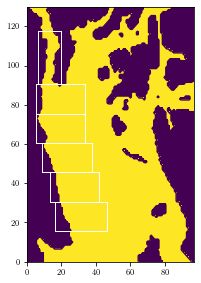

In [11]:
fig,ax=plt.subplots(1,1,figsize=(3,5))
viz_tools.set_aspect(ax)
ax.pcolormesh(nn.vmask0)
ax.pcolormesh(nn.tmask[0,:,:])
#ax.contour(tmask[k,:,:],[.5])
ax.contour(tmask[0,:,:],[.5])
for el in boxes.keys():
    iii,jjj=nn.makebox(nn.boxcoordsT(boxes[el]))
    ax.plot(iii-ig0,jjj-jg0,'-',color='w',linewidth=1)

In [12]:
flistV=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_V',1)
flistU=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_U',1)
flistW=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'dian_W',1)
flistC=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'carp_T',1)
flistT=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'ptrc_T',1)
flistR=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'prod_T',1)
flistP=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_T',1)
flistGV=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_V',1)
flistGU=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_U',1)

ftype=dian_V, are you sure? (if yes, add to list)
ftype=dian_U, are you sure? (if yes, add to list)
ftype=dian_W, are you sure? (if yes, add to list)
ftype=prod_T, are you sure? (if yes, add to list)


In [13]:
NBound, SBound, EBound, BBound, NBoundMix, SBoundMix, EBoundMix, BBoundMix, Content, Vol, A_N, A_S, A_E, times, boxes = nn.calcTransps(
    start,end,k1,mod_flen,fver,saveloc,boxes,boxesS,flistV,flistU,flistW,flistC,flistT,recalc=False)

In [14]:
boxPP,boxNPP,times2,boxes2=nn.calcProdBoxes(start,end,k1,mod_flen,fver,saveloc,boxes,boxesS,flistR,flistC,
                                                    recalc=False) #mol/s

In [15]:
for el in boxNPP:
    print(el,np.mean(boxNPP[el]))

0 6.507454858765601
1 16.880444102886834
2 17.37493305302867
3 18.40570072807635
4 18.01542996024161
5 17.903435021861174


In [16]:
# vertical transport into 4th box
np.shape(BBound[3])

(2352, 30)

In [17]:
meanT, meanM = nn.calcFluxFields(flistV,flistU,flistW,flistC,k,saveloc,start,end,fver,recalc=False)

In [18]:
recalc=False
fformat0='%Y%m%d'
savepathT=saveloc+'saveVolTransp_'+fver+'_k'+str(k)+'_'+start.strftime(fformat0)+\
                                                               '-'+end.strftime(fformat0)+'.pkl'
# calc mean velocities upper k
if recalc==True:
    VT_i=np.zeros((len(flistGV)*24,jg1-jg0,ig1-ig0))
    UT_i=np.zeros((len(flistGV)*24,jg1-jg0,ig1-ig0))
    for iif in range(0,len(flistGV)):
        with nc.Dataset(flistGV.loc[iif,['paths']].values[0]) as fv, \
              nc.Dataset(flistGU.loc[iif,['paths']].values[0]) as fu, \
                nc.Dataset(flistC.loc[iif,['paths']].values[0]) as fc:
            e3te=fc.variables['e3t'][:,:k,jg0:jg1,ig0:ig1]
            VTe=np.sum(0.5*(fv.variables['vomecrty'][:,:k,(jg0-1):(jg1-1),ig0:ig1]+fv.variables['vomecrty'][:,:k,jg0:jg1,ig0:ig1])*e3te,1)
            UTe=np.sum(0.5*(fu.variables['vozocrtx'][:,:k,jg0:jg1,(ig0-1):(ig1-1)]+fu.variables['vozocrtx'][:,:k,jg0:jg1,ig0:ig1])*e3te,1)
        VT_i[(iif*24):(iif*24+24),:,:]=VTe
        UT_i[(iif*24):(iif*24+24),:,:]=UTe
    mVT=np.mean(VT_i,0)
    mUT=np.mean(UT_i,0)
    fformat0='%Y%m%d'
    pickle.dump({'mVT':mVT,'mUT':mUT},open(savepathT,'wb'))
else:
    data=pickle.load(open(savepathT,'rb'))
    mVT=data['mVT']
    mUT=data['mUT']

In [19]:
recalc=False
savepathV=saveloc+'saveVel_'+fver+'_k'+str(k)+'_'+start.strftime(fformat0)+\
                                                               '-'+end.strftime(fformat0)+'.pkl'
# calc mean velocities upper k
if recalc==True:
    V_i=np.zeros((len(flistGV)*24,jg1-jg0,ig1-ig0))
    U_i=np.zeros((len(flistGV)*24,jg1-jg0,ig1-ig0))
    for iif in range(0,len(flistGV)):
        with nc.Dataset(flistGV.loc[iif,['paths']].values[0]) as fv, \
              nc.Dataset(flistGU.loc[iif,['paths']].values[0]) as fu, \
                nc.Dataset(flistC.loc[iif,['paths']].values[0]) as fc:
            e3te=fc.variables['e3t'][:,:k,jg0:jg1,ig0:ig1]
            Ve=np.sum(0.5*(fv.variables['vomecrty'][:,:k,(jg0-1):(jg1-1),ig0:ig1]+fv.variables['vomecrty'][:,:k,jg0:jg1,ig0:ig1])*e3te,1)/np.sum(e3te,1)
            Ue=np.sum(0.5*(fu.variables['vozocrtx'][:,:k,jg0:jg1,(ig0-1):(ig1-1)]+fu.variables['vozocrtx'][:,:k,jg0:jg1,ig0:ig1])*e3te,1)/np.sum(e3te,1)
        V_i[(iif*24):(iif*24+24),:,:]=Ve
        U_i[(iif*24):(iif*24+24),:,:]=Ue
    mV=np.mean(V_i,0)
    mU=np.mean(U_i,0)
    fformat0='%Y%m%d'
    pickle.dump({'mV':mV,'mU':mU},open(savepathV,'wb'))
else:
    data=pickle.load(open(savepathV,'rb'))
    mV=data['mV']
    mU=data['mU']

In [20]:
print(dt.datetime(2015, 6, 8)+dt.timedelta(hours=25*9))

2015-06-17 09:00:00


In [21]:
flistVE=et.index_model_files(dt.datetime(2015, 6, 8),dt.datetime(2015, 6, 17),mod_basedir,mod_nam_fmt,mod_flen,'dian_V',1)
flistUE=et.index_model_files(dt.datetime(2015, 6, 8),dt.datetime(2015, 6, 17),mod_basedir,mod_nam_fmt,mod_flen,'dian_U',1)
flistWE=et.index_model_files(dt.datetime(2015, 6, 8),dt.datetime(2015, 6, 17),mod_basedir,mod_nam_fmt,mod_flen,'dian_W',1)
flistCE=et.index_model_files(dt.datetime(2015, 6, 8),dt.datetime(2015, 6, 17),mod_basedir,mod_nam_fmt,mod_flen,'carp_T',1)
flistTE=et.index_model_files(dt.datetime(2015, 6, 8),dt.datetime(2015, 6, 17),mod_basedir,mod_nam_fmt,mod_flen,'ptrc_T',1)

ftype=dian_V, are you sure? (if yes, add to list)
ftype=dian_U, are you sure? (if yes, add to list)
ftype=dian_W, are you sure? (if yes, add to list)


In [22]:
# selected times based on NEWind2; shorten to start and end at midnight UTC
#(datetime.datetime(2015, 6, 7, 12, 0), datetime.datetime(2015, 6, 17, 22, 0))
meanTE, meanME = nn.calcFluxFields(flistVE,flistUE,flistWE,flistCE,k,saveloc,dt.datetime(2015, 6, 8),dt.datetime(2015, 6, 17),fver,recalc=False)

In [23]:
#repeat for relaxation period between upwelling events
flistVR=et.index_model_files(dt.datetime(2015, 6, 21),dt.datetime(2015, 6, 27),mod_basedir,mod_nam_fmt,mod_flen,'dian_V',1)
flistUR=et.index_model_files(dt.datetime(2015, 6, 21),dt.datetime(2015, 6, 27),mod_basedir,mod_nam_fmt,mod_flen,'dian_U',1)
flistWR=et.index_model_files(dt.datetime(2015, 6, 21),dt.datetime(2015, 6, 27),mod_basedir,mod_nam_fmt,mod_flen,'dian_W',1)
flistCR=et.index_model_files(dt.datetime(2015, 6, 21),dt.datetime(2015, 6, 27),mod_basedir,mod_nam_fmt,mod_flen,'carp_T',1)
flistTR=et.index_model_files(dt.datetime(2015, 6, 21),dt.datetime(2015, 6, 27),mod_basedir,mod_nam_fmt,mod_flen,'ptrc_T',1)
# selected times based on NEWind2; shorten to start and end at midnight UTC
#(datetime.datetime(2015, 6, 7, 12, 0), datetime.datetime(2015, 6, 17, 22, 0))
meanTR, meanMR = nn.calcFluxFields(flistVR,flistUR,flistWR,flistCR,k,saveloc,dt.datetime(2015, 6, 21),dt.datetime(2015, 6, 27),fver,recalc=False)

ftype=dian_V, are you sure? (if yes, add to list)
ftype=dian_U, are you sure? (if yes, add to list)
ftype=dian_W, are you sure? (if yes, add to list)


In [24]:
mapCol=(0.67, 0.8, 0.64) # rgb
cmb=cmocean.tools.crop_by_percent(cmocean.cm.balance, 45, which='both', N=None)
cmb.set_bad(mapCol)
cmc=cmocean.tools.crop_by_percent(cmocean.cm.tarn_r, 40, which='both', N=None)
cmc.set_bad(mapCol)

In [25]:
for el in BBound.keys():
    print(el,np.mean(np.sum(BBound[el][:,:k]+BBoundMix[el][:,:k],1))*1e-3)

0 97.12116205406923
1 92.09112734907879
2 -107.35764618425657
3 65.36713935950493
4 -0.8400263821804402
5 48.092731012886


#### Sum of vertical mixing and transport NO3 supply to region in boxes:

In [26]:
np.mean(np.sum(BBound[0][:,:k]+BBoundMix[0][:,:k]+\
               BBound[1][:,:k]+BBoundMix[1][:,:k]+\
               BBound[2][:,:k]+BBoundMix[2][:,:k]+\
               BBound[3][:,:k]+BBoundMix[3][:,:k]+\
               BBound[4][:,:k]+BBoundMix[4][:,:k]+\
               BBound[5][:,:k]+BBoundMix[5][:,:k],1))*1e-3

194.47448720910194

##### Divide by area:

In [27]:
ABoxes=nn.boxAreas(k)

volumes: 
(40, 130, 97)
0 vol: 232834007.16923195 m3
0 north face area: 0.017903174399708822 km2
0 south face area: 0.023887115963210383 km2
0 east face area: 0.0 km2
0 floor area: 38.10316762126778 km2
0 floor area: 38.10316762126778 km2
(40, 130, 97)
1 vol: 475501033.2591236 m3
1 north face area: 0.051981996171633744 km2
1 south face area: 0.0660928789851366 km2
1 east face area: 0.04443908484818648 km2
1 floor area: 76.65649877674242 km2
1 floor area: 76.65649877674242 km2
(40, 130, 97)
2 vol: 467855857.4262955 m3
2 north face area: 0.0660928789851366 km2
2 south face area: 0.058877382444252245 km2
2 east face area: 0.044474769797453136 km2
2 floor area: 76.13281888160705 km2
2 floor area: 76.13281888160705 km2
(40, 130, 97)
3 vol: 475349561.3011287 m3
3 north face area: 0.0691002936013758 km2
3 south face area: 0.05633497645148102 km2
3 east face area: 0.044501987470235926 km2
3 floor area: 77.68207812856889 km2
3 floor area: 77.68207812856889 km2
(40, 130, 97)
4 vol: 460253674.339

In [28]:
# units are umol/m2/s
Asum=ABoxes[0]+ABoxes[1]+ABoxes[2]+ABoxes[3]+ABoxes[4]+ABoxes[5]
np.mean(BBound[0][:,k-1]+BBoundMix[0][:,k-1]+\
               BBound[1][:,k-1]+BBoundMix[1][:,k-1]+\
               BBound[2][:,k-1]+BBoundMix[2][:,k-1]+\
               BBound[3][:,k-1]+BBoundMix[3][:,k-1]+\
               BBound[4][:,k-1]+BBoundMix[4][:,k-1]+\
               BBound[5][:,k-1]+BBoundMix[5][:,k-1],0)/Asum*1e3

0.1351066027235024

In [29]:
NBoundC, SBoundC, EBoundC, BBoundC, NBoundMixC, SBoundMixC, EBoundMixC, BBoundMixC = \
    nn.transpConversions(boxes,NBound,SBound,EBound,BBound,NBoundMix,SBoundMix,EBoundMix,BBoundMix,k)

units now mol/s
0
7.39300341644674 -41.378174652504235 0.0
-0.00423133967227319 62.44237898198768 0.0
1
-23.83794554675026 4.770518232849538 -3.8229758801964495
-0.003950799751368105 30.772049966378315 0.013124230748825082
2
-52.0977795323746 -45.202608013749035 -5.643747348079804
0.021918495494385674 12.150808837694095 0.008276160547742781
3
-12.768916939366115 16.854874454971412 -1.8655704060618172
0.0011224418975013283 4.15932001806212 0.004729961873096263
4
-24.2239356581983 -5.46075012890744 1.908029003914207
0.00035714024465087013 3.4055359620951 0.0022939313103942757
5
-9.906736267796912 10.433125493240455 3.6044078905157537
0.014825382070140185 4.105448579550347 0.00842065142436018


In [30]:
BBoundC

{0: -41.378174652504235,
 1: 4.770518232849538,
 2: -45.202608013749035,
 3: 16.854874454971412,
 4: -5.46075012890744,
 5: 10.433125493240455}

In [31]:
# all 6 boxes:
# umol n/m2/s:
(BBoundC[0]+BBoundMixC[0]+\
               BBoundC[1]+BBoundMixC[1]+\
               BBoundC[2]+BBoundMixC[2]+\
               BBoundC[3]+BBoundMixC[3]+\
               BBoundC[4]+BBoundMixC[4]+\
               BBoundC[5]+BBoundMixC[5])/Asum*1e6

0.13510660272350247

In [32]:
# first 2 boxes:
# umol n/m2/s:
Asum2=ABoxes[0]+ABoxes[1]
(BBoundC[0]+BBoundMixC[0]+\
               BBoundC[1]+BBoundMixC[1])/Asum2*1e6

0.49326365530191885

In [33]:
BBoundC[0]+BBoundMixC[0]+\
               BBoundC[1]+BBoundMixC[1]

56.6067725287113

In [34]:
BBoundC

{0: -41.378174652504235,
 1: 4.770518232849538,
 2: -45.202608013749035,
 3: 16.854874454971412,
 4: -5.46075012890744,
 5: 10.433125493240455}

In [35]:
mask=dict()
mask['V']=vmask0
mask['U']=umask0
mask['W']=tmask[k,:,:]

In [37]:
fig=plt.figure(figsize=(7.5,5.2))
gs0=gridspec.GridSpec(2,2,hspace=0.24,wspace=.13,left=.01,right=.93,bottom=.022,top=.92,
                      width_ratios=[1,1],height_ratios=[1,1])
ax=list()
cbax=list()
for jx in range(0,2):
    if jx==0:
        gsi=gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0,jx],
                                         width_ratios=[10,10*(ig1-ig0-.5)/(ig1-ig0+13),11-10*(ig1-ig0-.5)/(ig1-ig0+13)],wspace=.1)
        gsl=gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[1,jx],
                                         width_ratios=[10,10,1],wspace=.1)
    elif jx==1:
        gsi=gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[0,jx],
                                         width_ratios=[10,10,1],wspace=.1)
        gsl2=gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[1,jx],
                                         width_ratios=[10,10,1],wspace=.1)
    ax1=fig.add_subplot(gsi[0])
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    viz_tools.set_aspect(ax1)
    ax2=fig.add_subplot(gsi[1])
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    viz_tools.set_aspect(ax2)
    ax3=fig.add_subplot(gsi[2])
    ax.append(ax1,)
    ax.append(ax2,)
    cbax.append(ax3,)
ax4=fig.add_subplot(gsl2[0])
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
viz_tools.set_aspect(ax4)
ax5=fig.add_subplot(gsl2[1])
ax5.get_xaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)
viz_tools.set_aspect(ax5)
ax6=fig.add_subplot(gsl2[2])
ax7=fig.add_subplot(gsl[0])
viz_tools.set_aspect(ax7)
ax9=fig.add_subplot(gsl[2])
ax.append(ax4,)
ax.append(ax5,)
ax.append(ax7,)
cbax.append(ax6,)
cbax.append(ax9,)

v1=3000
m=ax[0].pcolormesh(np.ma.masked_where(mask['V']==0,1000*(meanT['V']+meanM['V'])),cmap=cmb,vmin=-1*v1,vmax=v1)
ax[0].set_title('Northward NO$_3$\nFlux ($\muup$mol N m$^{-2}$ s$^{-1}$)\nAdvection + Mixing')
m=ax[1].pcolormesh(np.ma.masked_where(mask['U']==0,1000*(meanT['U']+meanM['U'])),cmap=cmb,vmin=-1*v1,vmax=v1)
cb0=fig.colorbar(m,cax=cbax[0])
ax[1].set_title('Eastward NO$_3$\nFlux ($\muup$mol N m$^{-2}$ s$^{-1}$)\nAdvection + Mixing')
v2=15
m=ax[2].pcolormesh(np.ma.masked_where(mask['W']==0,1000*(meanT['W'])),cmap=cmc,vmin=-1*v2,vmax=v2)
ax[2].set_title('Vertical NO$_3$\nFlux ($\muup$mol N m$^{-2}$ s$^{-1}$)\nAdvection')
m=ax[3].pcolormesh(np.ma.masked_where(mask['W']==0,1000*(meanM['W'])),cmap=cmc,vmin=-1*v2,vmax=v2)
cb1=fig.colorbar(m,cax=cbax[1])
ax[3].set_title('Vertical NO$_3$\nFlux ($\muup$mol N m$^{-2}$ s$^{-1}$)\nMixing')

nn.drawboxesV(ax[0],boxes,boxCol)
nn.drawboxesU(ax[1],boxes,boxCol)
nn.drawboxesT(ax[2],boxes,boxCol)
nn.drawboxesT(ax[3],boxes,boxCol)
for iax in ax:
    iax.set_facecolor(mapCol)
ax[0].set_xlim(-13,ig1-ig0)
ax[1].set_xlim(0,ig1-ig0-.5)
ax[2].set_xlim(-13,ig1-ig0)
ax[3].set_xlim(-13,ig1-ig0)

ax[0].set_ylim(.5,jg1-jg0-.5)
ax[1].set_ylim(1,jg1-jg0)
ax[2].set_ylim(1,jg1-jg0)
ax[3].set_ylim(1,jg1-jg0)

nn.annotYTranspUpper(ax[0],boxes,NBoundC,SBoundC,NBoundMixC,SBoundMixC)
nn.annotXTranspUpper(ax[1],boxes,EBoundC,EBoundMixC)
nn.annotWTTranspUpper(ax[2],boxes,BBoundC)
nn.annotWMTranspUpper(ax[3],boxes,BBoundMixC)
#nn.annotPPUpper(iax,boxes,NPP,prec=1)

x1=ax[1].get_position()
xc1=cbax[0].get_position()
cbax[0].set_position(mpl.transforms.Bbox.from_bounds(xc1.bounds[0],x1.bounds[1],.015,x1.bounds[3]))
x2=ax[3].get_position()
xc2=cbax[1].get_position()
cbax[1].set_position(mpl.transforms.Bbox.from_bounds(xc2.bounds[0],x2.bounds[1],.015,x2.bounds[3]))

fig.canvas.draw()
for icb in (cb0,cb1):
    test=icb.ax.yaxis.get_ticklabels()
    test[0].set_text('$\leq$'+(test[0].get_text()))
    test[-1].set_text('$\geq$'+(test[-1].get_text()))
    icb.ax.yaxis.set_ticklabels(test)

cm0=cmocean.cm.thermal
cm0.set_bad(mapCol)
cm1=cmocean.cm.dense_r
cm1.set_bad(mapCol)
iax=ax[5]
clim=(0,5000)
subN=9
sh=np.shape(meanT['V'])
shx,shy=np.meshgrid(np.arange(1,sh[1],subN),np.arange(1,sh[0],subN))
#log scale arrow magnitude without ruining vector directions:
ugrd=1000*0.5*(meanTR['U'][1:,:-1]+meanTR['U'][1:,1:])
vgrd=1000*0.5*(meanTR['V'][:-1,1:]+meanTR['V'][1:,1:])
mesh=iax.contourf(np.ma.masked_where(tmask[0,1:,1:]==0,
    np.sqrt(ugrd[:,:]**2+vgrd[:,:]**2)),
    np.linspace(clim[0],clim[1],200),vmin=clim[0],vmax=clim[1],cmap=cm0,extend='max')
mag0=np.sqrt(ugrd**2+vgrd**2)
#mag2=np.log10(mag0+100)-np.log10(100)
ugrd2=np.ma.masked_where(tmask[0,1:,1:]==0,ugrd)#np.where(mag0==0,0,ugrd*mag2/mag0))
vgrd2=np.ma.masked_where(tmask[0,1:,1:]==0,vgrd)#np.where(mag0==0,0,vgrd*mag2/mag0))
Q = iax.quiver(shx,shy,ugrd2[1::subN, 1::subN], vgrd2[1::subN, 1::subN],
                               pivot='mid', units='inches',width=.03,color='w',scale=8000,alpha=.7)#scale=4000
iax.set_title('Horizontal NO$_3$\nFlux ($\muup$mol N m$^{-2}$ s$^{-1}$)\nRelaxed')
iax.set_xticks([],[]);
iax.set_yticks([],[]);

iax=ax[4]
#log scale arrow magnitude without ruining vector directions:
ugrd=1000*0.5*(meanTE['U'][1:,:-1]+meanTE['U'][1:,1:])
vgrd=1000*0.5*(meanTE['V'][:-1,1:]+meanTE['V'][1:,1:])
mesh=iax.contourf(np.ma.masked_where(tmask[0,1:,1:]==0,
    np.sqrt(ugrd[:,:]**2+vgrd[:,:]**2)),
    np.linspace(clim[0],clim[1],200),vmin=clim[0],vmax=clim[1],cmap=cm0,extend='max')
mag0=np.sqrt(ugrd**2+vgrd**2)
#mag2=np.log10(mag0+100)-np.log10(100)
ugrd2=np.ma.masked_where(tmask[0,1:,1:]==0,ugrd)#np.where(mag0==0,0,ugrd*mag2/mag0))
vgrd2=np.ma.masked_where(tmask[0,1:,1:]==0,vgrd)#np.where(mag0==0,0,vgrd*mag2/mag0))
Q = iax.quiver(shx,shy,ugrd2[1::subN, 1::subN], vgrd2[1::subN, 1::subN],
                               pivot='mid', units='inches',width=.03,color='w',scale=8000,alpha=.7)#scale=4000
iax.set_title('Horizontal NO$_3$\nFlux ($\muup$mol N m$^{-2}$ s$^{-1}$)\nUpwelling')
iax.set_xticks([],[]);
iax.set_yticks([],[]);
cb=fig.colorbar(mesh,cax=cbax[2],ticks=np.linspace(clim[0],clim[1],6))

iax=ax[6]
ii0=6
#log scale arrow magnitude without ruining vector directions:
clim=(0,3.5)
subN=9
sh=np.shape(mUT)#mUT
shx,shy=np.meshgrid(np.arange(ii0,sh[1],subN),np.arange(ii0,sh[0],subN))
#log scale arrow magnitude without ruining vector directions:
ugrd=mUT
vgrd=mVT
mesh=iax.contourf(np.ma.masked_where(tmask[0,:,:]==0,
    np.sqrt(ugrd[:,:]**2+vgrd[:,:]**2)),
    np.linspace(clim[0],clim[1],200),vmin=clim[0],vmax=clim[1],cmap=cm1,extend='max')
mag0=np.sqrt(ugrd**2+vgrd**2)
ugrd2=np.ma.masked_where(tmask[0,:,:]==0,ugrd)#np.where(mag0==0,0,ugrd*mag2/mag0))
vgrd2=np.ma.masked_where(tmask[0,:,:]==0,vgrd)#np.where(mag0==0,0,vgrd*mag2/mag0))
Q = iax.quiver(shx,shy,ugrd2[ii0::subN, ii0::subN], vgrd2[ii0::subN, ii0::subN],
                               pivot='mid', units='inches',width=.03,color='w',scale=7,alpha=.7)#scale=4000
iax.set_title('Vertically Integrated\nVelocity (m$^2$ s$^{-1}$)')
iax.set_xticks([],[]);
iax.set_yticks([],[]);
cb=fig.colorbar(mesh,cax=cbax[3],ticks=np.linspace(clim[0],clim[1],6))
bb=cbax[3].get_position()
cbax[3].set_position([bb.x0-.205,bb.y0,bb.width,bb.height])
#p0=ax1.get_position()

x1=ax[4].get_position()
axP=fig.add_axes(mpl.transforms.Bbox.from_bounds(x1.bounds[1]+.33,x1.bounds[1],x1.bounds[2]-.06,x1.bounds[3]-.03))
fformatA='%Y%m%d'
savepath='../../save/transpDiscovery2'+start.strftime(fformatA)+'-'+end.strftime(fformatA)+'.pkl'
dataT=pickle.load(open(savepath,'rb'))
masksT=dataT['masks']
gdept_1dT=dataT['gdept_1d']
e3t_1dT=dataT['e3t_1d']
no3TD=dataT['no3TD']
iikb=np.sum(np.amax(masksT['N'],1))+1
axP.plot(np.mean(np.sum(no3TD['N'],2)/e3t_1dT,0)[:iikb]*1e-3,-1*gdept_1dT[:iikb],'k-')
iikb=np.sum(np.amax(masksT['S'],1))+1
axP.plot(np.mean(np.sum(no3TD['S'],2)/e3t_1dT,0)[:iikb]*1e-3,-1*gdept_1dT[:iikb],'k--')
axP.plot((0,0),(-100,0),'k-',lw=1)
axP.set_xlabel('NO$_3$ Transport\n(mol m$^{-1}$ s$^{-1}$)')
axP.set_ylabel('z (m)',labelpad=-.2)
axP.set_ylim(-100,0)
axP.xaxis.tick_top()
axP.xaxis.set_label_position('top')
axP.text(-.24/(24*3600)*1e6,-72,'DS',fontsize=8)
axP.text(-.29/(24*3600)*1e6,-32,'DN',fontsize=8)
axP.axhspan(-100, -6, color='gainsboro')

fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsNNut/Ntransports_k'+str(k)+'.png',dpi=300)
fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsNNut/Ntransports_k'+str(k)+'.pdf',dpi=300)
print('/data/eolson/results/MEOPAR/biomodelevalpaper/figsNNut/Ntransports_k'+str(k)+'.pdf')

RuntimeError: latex was not able to process the following string:
b'[13.1 12.4 11.1 ... 13.7 14.3 14.2]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/eolson/.cache/matplotlib/tex.cache/9b4f0224df3b2f3469287d584b649d3a.tex
LaTeX2e <2016/02/01>
Babel <3.9q> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.4 ^^M
       
No pages of output.
Transcript written on 9b4f0224df3b2f3469287d584b649d3a.log.




RuntimeError: latex was not able to process the following string:
b'[13.1 12.4 11.1 ... 13.7 14.3 14.2]'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/eolson/.cache/matplotlib/tex.cache/9b4f0224df3b2f3469287d584b649d3a.tex
LaTeX2e <2016/02/01>
Babel <3.9q> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.4 ^^M
       
No pages of output.
Transcript written on 9b4f0224df3b2f3469287d584b649d3a.log.




<Figure size 540x374.4 with 12 Axes>

In [ ]:
np.max(meanTE['V']-meanT['V'])

vertical transports, summed over boxes:

In [ ]:
totVert=0
for el in range(0,len(boxes)):
    totVert=totVert+BBoundC[el]+BBoundMixC[el]
print('all boxes:',totVert, 'mol/s')
totVert=0
for el in range(0,2):
    totVert=totVert+BBoundC[el]+BBoundMixC[el]
print('first 2 boxes:',totVert, 'mol/s')

### look at total upward N transports

In [ ]:
fig,ax=plt.subplots(1,1)
ax.pcolormesh(np.ma.masked_where(mask['W']==0,1000*(meanT['W']+meanM['W'])),
               cmap=cmc,vmin=-1,vmax=1)
nn.drawboxesV(ax,boxes,boxCol)

In [ ]:
## total net N transport in moles N / s
np.sum(np.sum(np.ma.masked_where(mask['W']==0,1000*(meanT['W']+meanM['W'])*e12t),1),0)*1e-6


In [ ]:
## total net N transport in moles N / s
np.sum(np.sum(np.ma.masked_where(mask['W'][:-3,:]==0,1000*(meanT['W'][:-3,:]+meanM['W'][:-3,:])*e12t[:-3,:]),1),0)*1e-6


##### divide both by area:

In [ ]:
# whole range, umol/m2/s
np.sum(np.sum(np.ma.masked_where(mask['W']==0,1000*(meanT['W']+meanM['W'])*e12t),1),0)/np.sum(np.sum(e12t*mask['W']))

In [ ]:
# cut off 3, umol/m2/s
np.sum(np.sum(np.ma.masked_where(mask['W'][:-3,:]==0,1000*(meanT['W'][:-3,:]+meanM['W'][:-3,:])*e12t[:-3,:]),1),0)/np.sum(np.sum(e12t[:-3,:]*mask['W'][:-3,:]))

### look at depths/ e3ts

In [ ]:
Zs, tmk = nn.compileZ_k(start,end,k,mod_basedir,mod_nam_fmt,mod_flen,fver,saveloc,recalc=False)

In [ ]:
np.min(np.ma.masked_where(Zs==0,Zs))

In [ ]:
np.max(np.ma.masked_where(Zs==0,Zs))

In [ ]:
np.shape(Zs)

In [ ]:
iso90_pts=np.loadtxt('/ocean/eolson/MEOPAR/analysis-elise/notebooks/NorthernNitrate/ts90.txt', delimiter=' ', dtype=int)
iso90=np.array([[a,b] for (a,b) in iso90_pts if ((a-644)<130)])
iso90_DIAN=np.array([[a-644,b-112] for (a,b) in iso90])

In [ ]:
np.min(Zs[:,iso90_DIAN[:, 0], iso90_DIAN[:, 1]]),np.max(Zs[:,iso90_DIAN[:, 0], iso90_DIAN[:, 1]])

In [ ]:
plt.pcolormesh(Zs[0,:,:])
plt.plot(iso90_DIAN[:, 1],iso90_DIAN[:, 0])

In [ ]:
fig,ax=plt.subplots(1,1)
ax.pcolormesh(np.ma.masked_where(mask['W']==0,1000*(meanT['W']+meanM['W'])),
               cmap=cmc,vmin=-5,vmax=5)
ax.plot(iso90_DIAN[:, 1],iso90_DIAN[:, 0],'k-')
nn.drawboxesV(ax,boxes,boxCol)

In [ ]:
plt.plot(Zs[0,iso90_DIAN[:, 0], iso90_DIAN[:, 1]],'k.')

In [ ]:
plt.pcolormesh(np.min(Zs[:,:,:],0))
plt.colorbar()

In [ ]:
np.shape(Zs)

In [ ]:
plt.pcolormesh(np.max(Zs[:,:,:],0))
plt.colorbar()

In [ ]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    e3t0=np.copy(mesh.variables['e3t_0'][0,:,jg0:jg1,ig0:ig1])

In [ ]:
bathy=np.sum(e3t0*tmask,0)

In [ ]:
plt.pcolormesh(bathy)
plt.colorbar()

In [ ]:
shallowMin=np.ma.masked_where(np.logical_or(tmask[k,:,:]==0,bathy>50),np.min(Zs,0))
np.min(shallowMin)

In [ ]:
shallowMax=np.ma.masked_where(np.logical_or(tmask[k,:,:]==0,bathy>50),np.max(Zs,0))
np.max(shallowMax)

In [ ]:
deepMin=np.ma.masked_where(np.logical_or(tmask[k,:,:]==0,bathy<50),np.min(Zs,0))
np.min(deepMin)

In [ ]:
deepMax=np.ma.masked_where(np.logical_or(tmask[k,:,:]==0,bathy<50),np.max(Zs,0))
np.max(deepMax)

In [ ]:
np.min(bathy[iso90_DIAN[:, 0], iso90_DIAN[:, 1]])

In [ ]:
## check ssh in this area
#start,end,k,mod_basedir,mod_nam_fmt,mod_flen,fver,saveloc,recalc=False
flistC=et.index_model_files(start,end,mod_basedir,mod_nam_fmt,mod_flen,'grid_T',1)
ti=start
ssh_i=list()
for iif in range(0,len(flistC)):
    if iif%20==0:
        print(iif)
    with nc.Dataset(flistC.loc[iif,['paths']].values[0]) as f:
        ssh_i.append(tmk*f.variables['sossheig'][:,jg0:jg1,ig0:ig1])
ssh=np.concatenate(ssh_i,axis=0)

In [ ]:
deepMin=np.ma.masked_where(np.logical_or(tmask[k,:,:]==0,bathy<50),np.min(ssh,0))
np.min(deepMin)

In [ ]:
deepMax=np.ma.masked_where(np.logical_or(tmask[k,:,:]==0,bathy<50),np.max(ssh,0))
np.max(deepMax)

In [ ]:
deepMax=np.ma.masked_where(np.logical_or(tmask[k,:,:]==0,bathy<50),np.sum(e3t0[:k,:,:],0))
np.max(deepMax)

In [ ]:
np.unravel_index(np.argmax(np.ma.masked_where(np.logical_or(tmask[k,:,:]*np.ones(np.shape(ssh))==0,bathy<50),ssh)),np.shape(ssh))

In [ ]:
np.shape(bathy),np.shape(tmask)

In [ ]:
bathy[23,89],np.sum(e3t0[:,23,89]*tmask[:,23,89])

In [ ]:
np.sum(e3t0[:k,23,89])

In [ ]:
1.7149043*np.sum(e3t0[:k,23,89])/bathy[23,89]+np.sum(e3t0[:k,23,89])

In [ ]:
Zs[1326,23,89]

In [ ]:
np.shape(Zs)

In [ ]:
np.shape(ssh)

In [ ]:
#e3t=(1+ssh/H)*e3t0
print('e3t:',Zs[1326, 23, 89])
print('(1+ssh/H)*e3t0:',(1+ssh[1326, 23, 89]/bathy[23,89])*np.sum(e3t0[:k,23,89]))